In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [18]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='2005-1-1')['Adj Close']

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3780 entries, 2004-12-31 to 2020-01-07
Data columns (total 4 columns):
PG      3780 non-null float64
MSFT    3780 non-null float64
F       3780 non-null float64
GE      3780 non-null float64
dtypes: float64(4)
memory usage: 147.7 KB


In [20]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2004-12-31,35.801205,19.385986,9.384643,20.907282
2005-01-03,35.872684,19.400494,9.429514,20.958834
2005-01-04,35.424213,19.473045,9.397462,20.706812
2005-01-05,35.794704,19.429512,9.250029,20.580790
2005-01-06,35.970203,19.407743,9.262847,20.746906


In [21]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-12-31,124.900002,157.699997,9.30,11.16
2020-01-02,123.410004,160.619995,9.42,11.93
2020-01-03,122.580002,158.619995,9.21,11.97
2020-01-06,122.750000,159.029999,9.16,12.14
2020-01-07,121.989998,157.580002,9.25,12.05


In [22]:
mydata.iloc[0]

PG      35.801205
MSFT    19.385986
F        9.384643
GE      20.907282
Name: 2004-12-31 00:00:00, dtype: float64

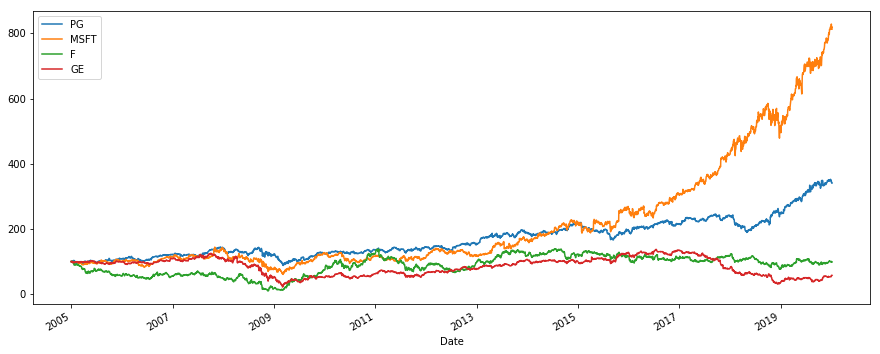

In [23]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [25]:
mydata.loc['2005-01-03']

PG      35.872684
MSFT    19.400494
F        9.429514
GE      20.958834
Name: 2005-01-03 00:00:00, dtype: float64

Calculating thr Return of a Portfolio of Securities

In [26]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
2004-12-31,NaN,NaN,NaN,NaN
2005-01-03,0.001997,0.000748,0.004781,0.002466
2005-01-04,-0.012502,0.003740,-0.003399,-0.012025
2005-01-05,0.010459,-0.002236,-0.015689,-0.006086
2005-01-06,0.004903,-0.001120,0.001386,0.008071


In [27]:
weights = np.array([0.25,0.25,0.25,0.25])

In [28]:
np.dot(returns, weights)

array([        nan,  0.002498  , -0.00604645, ..., -0.00952936,
        0.00318623, -0.00322435])

np.doc()- calculates vector or matrix products

In [31]:
annual_returns = returns.mean()*250
annual_returns

PG      0.095400
MSFT    0.171848
F       0.082748
GE      0.009668
dtype: float64

In [32]:
np.dot(annual_returns,weights)

0.08991563777131144

In [34]:
pfolio_1 = str(round(np.dot(annual_returns,weights),5)*100)+'%'
print (pfolio_1)

8.992%


In [35]:
weights = np.array([0.4,0.4,0.15,0.05])

In [37]:
pfolio_2 = str(round(np.dot(annual_returns,weights),5)*100)+'%'
print (pfolio_2)
print (pfolio_1)

11.979%
8.992%
